# Modelo de Clusterización
* Modelo enfocado a detectar **posibles clusters** o diferentes grupos de clientes


## Librerias

In [45]:
# Librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import seaborn as sns # importando seaborn
# Librería para obtener correlación
import scipy.stats as ss
# Librería para obtener todas las combinaciones (c/repetidos) de una lista
from mpl_toolkits import mplot3d
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pickle


from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


## Paths

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
HT_PATH = '/content/drive/MyDrive/Hackaton BBVA/Tablas_guardadas'
VR_PATH = '/content/drive/MyDrive/Reto Vinculación rentable'

#Dejar todo a dos puntos decimales
pd.options.display.float_format = "{:.2f}".format


#Crgar archivo de info
path = HT_PATH + "/bbva_fisicas.csv"
df = pd.read_csv(path)
df = df.drop(columns=["Unnamed: 0"])
df.head()

#Mostramos los primeros 10 valores del archivo
df.head(10)

,CODIGO_CLIENTE,TIPO_DOCUMENTO,NUMERO_DOCUMENTO,EDAD,GENERO,UBIGEO_DIRECCION,SEGMENTO_COMERCIAL,ESTADO_CIVIL,AFILIACION_SMS,AFILIACION_BANCA_ONLINE,INGRESO_MENSUAL,GRUPO_RIESGO,PERIODO,RIESGO1,RIESGO2,SALDO_MEDIO_VISTA,SALDO_MEDIO_AHORRO,SALDO_MEDIO_CTS,SALDO_MEDIO_PLAZO,SALDO_MEDIO_FONDO_MUTUO,SALDO_MEDIO_AUTOS,SALDO_MEDIO_CONSUMO,SALDO_MEDIO_TARJETAS,SALDO_MEDIO_HIPOTECARIO,SALDO_MEDIO_CARTERA,SALDO_MEDIO_LEASING,SALDO_MEDIO_PRESTAMOS_COMERCIALES,SALDO_MEDIO_COMEXT,SALDO_MEDIO_TJ_EMPRESAS,T_NETCASH,T_SEGURO,T_WALLET,T_TCAMBIO,T_AFILIACION_DIGITAL,T_CARGO_RECURRENTE,SALDO_MEDIO_INVERSION_RENTABLE,SALDO_MEDIO_CARTERA_ATRASADA,VINCULACION_PN,VINCULACION_EMPRESA,FAM_GLOBAL,SALDO_PUNTUAL,MARGEN_BRUTO,EXPOSICION_DEFAULT,PERDIDA_ESPERADA,NUMERADOR_RATIO_RENTABILIDAD,DENOMINADOR_RATIO_RENTABILIDAD,ABONOS_TDC,CARGOS_TDC,AUTOS_RENT_PROD,CARTERA_RENT_PROD,COMEXT_RENT_PROD,CONSUMO_RENT_PROD,HIPOTECARIO_RENT_PROD,LEASING_RENT_PROD,PRESTAMOS_COMERCIALES_RENT_PROD,TARJETAS_RENT_PROD,TJ_EMPRESAS_RENT_PROD,NO_PRODUCTOS_RENT_PROD,SALDO_PUNTUAL_RENT_PROD_RENT_PROD,MARGEN_BRUTO_RENT_PROD_RENT_PROD,EXPOSICION_DEFAULT_RENT_PROD_RENT_PROD,PERDIDA_ESPERADA_RENT_PROD_RENT_PROD,NUMERADOR_RATIO_RENTABILIDAD_RENT_PROD_RENT_PROD,DENOMINADOR_RATIO_RENTABILIDAD_RENT_PROD_RENT_PROD,AUTOS_OTROS,CARTERA_OTROS,COMEXT_OTROS,CONSUMO_OTROS,HIPOTECARIO_OTROS,LEASING_OTROS,PRESTAMOS_COMERCIALES_OTROS,TARJETAS_OTROS,TJ_EMPRESAS_OTROS,NO_PRODUCTOS_OTROS,SALDO_OTROS,ATT,ABANDONO
0,78061255,1,38149491,76,F,2501006,1,S,NO,NO,1038.63,0,202011,0,0,0.00,1.87,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0.00,0.00,0,0,0,1.87,0.08,0.00,0.00,0.05,0.01,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00
1,48102108,1,23914625,56,M,2501001,1,D,NO,NO,1038.63,0,202011,0,0,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0.00,0.00,0,0,0,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00
2,75218927,1,2180900,66,F,2501001,1,S,SI,SI,824.78,1,202011,0,0,0.00,12722.36,0.00,0.00,0.00,0.00,293.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,1,0,1,0,7139.34,0.00,1,0,0,19145.39,1589.23,6982.50,201.67,978.23,866.84,0.00,0.00,0,0,0,1,0,0,0,1,0,2,6979.44,958.61,6982.50,201.67,533.64,755.69,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00
3,32630609,1,51973609,61,F,1601004,1,C,SI,SI,2023.63,0,202011,0,0,0.00,135.78,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,1,0,0.00,0.00,0,0,0,135.77,4.77,0.00,0.00,3.36,0.84,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00
4,96551001,1,17727421,68,M,2501001,1,V,SI,SI,993.06,1,202011,0,0,5120.33,17400.33,0.00,11981.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,1,1,0,1,0,0.00,0.00,1,0,0,454235.88,14503.66,29660.92,329.06,9993.09,2556.27,0.00,0.00,0,0,0,1,0,0,0,1,0,2,0.00,399.00,29660.92,329.06,49.31,70.32,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00
5,98481942,1,88444952,57,M,2501001,1,S,NO,NO,1124.50,2,202011,2,0,0.00,3.49,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0.00,0.00,0,0,0,3.49,0.14,0.00,0.00,0.10,0.02,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00
6,26257807,1,94681340,65,M,2501006,1,S,NO,NO,1138.38,0,202011,0,0,0.00,1.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0.00,0.00,0,0,0,1.13,0.05,0.00,0.00,0.03,0.01,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00
7,13926033,1,27399130,85,F,2501001,1,C,SI,SI,476.33,0,202011,0,0,0.00,723.23,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,1,0,0.00,0.00,0,0,0,735.92,26.14,0.00,0.00,18.43,4.61,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00
8,61822320,1,87672574,66,F,2501001,1,D,SI,NO,1124.50,2,202011,1,1,0.00,3.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,

In [48]:
# Variables categoricas

#df.dtypes

cat = [
"GENERO",
"ESTADO_CIVIL",
"AFILIACION_SMS",
"AFILIACION_BANCA_ONLINE"
]

In [49]:
dummy = pd.get_dummies(df[cat])
dummy

,GENERO_F,GENERO_M,ESTADO_CIVIL_C,ESTADO_CIVIL_D,ESTADO_CIVIL_O,ESTADO_CIVIL_S,ESTADO_CIVIL_V,AFILIACION_SMS_NO,AFILIACION_SMS_SI,AFILIACION_BANCA_ONLINE_NO,AFILIACION_BANCA_ONLINE_SI
0,1,0,0,0,0,1,0,1,0,1,0
1,0,1,0,1,0,0,0,1,0,1,0
2,1,0,0,0,0,1,0,0,1,0,1
3,1,0,1,0,0,0,0,0,1,0,1
4,0,1,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
600038,0,1,0,0,0,1,0,0,1,0,1
600039,1,0,0,0,0,1,0,0,1,0,1
600040,1,0,0,0,0,1,0,0,1,0,1
600041,0,1,1,0,0,0,0,1,0,1,0


In [50]:
df = df.drop(columns=cat)
df = df.fillna(0)
#df

In [51]:
df = pd.concat([df,dummy], axis=1)
df

,CODIGO_CLIENTE,TIPO_DOCUMENTO,NUMERO_DOCUMENTO,EDAD,UBIGEO_DIRECCION,SEGMENTO_COMERCIAL,INGRESO_MENSUAL,GRUPO_RIESGO,PERIODO,RIESGO1,RIESGO2,SALDO_MEDIO_VISTA,SALDO_MEDIO_AHORRO,SALDO_MEDIO_CTS,SALDO_MEDIO_PLAZO,SALDO_MEDIO_FONDO_MUTUO,SALDO_MEDIO_AUTOS,SALDO_MEDIO_CONSUMO,SALDO_MEDIO_TARJETAS,SALDO_MEDIO_HIPOTECARIO,SALDO_MEDIO_CARTERA,SALDO_MEDIO_LEASING,SALDO_MEDIO_PRESTAMOS_COMERCIALES,SALDO_MEDIO_COMEXT,SALDO_MEDIO_TJ_EMPRESAS,T_NETCASH,T_SEGURO,T_WALLET,T_TCAMBIO,T_AFILIACION_DIGITAL,T_CARGO_RECURRENTE,SALDO_MEDIO_INVERSION_RENTABLE,SALDO_MEDIO_CARTERA_ATRASADA,VINCULACION_PN,VINCULACION_EMPRESA,FAM_GLOBAL,SALDO_PUNTUAL,MARGEN_BRUTO,EXPOSICION_DEFAULT,PERDIDA_ESPERADA,...,AUTOS_RENT_PROD,CARTERA_RENT_PROD,COMEXT_RENT_PROD,CONSUMO_RENT_PROD,HIPOTECARIO_RENT_PROD,LEASING_RENT_PROD,PRESTAMOS_COMERCIALES_RENT_PROD,TARJETAS_RENT_PROD,TJ_EMPRESAS_RENT_PROD,NO_PRODUCTOS_RENT_PROD,SALDO_PUNTUAL_RENT_PROD_RENT_PROD,MARGEN_BRUTO_RENT_PROD_RENT_PROD,EXPOSICION_DEFAULT_RENT_PROD_RENT_PROD,PERDIDA_ESPERADA_RENT_PROD_RENT_PROD,NUMERADOR_RATIO_RENTABILIDAD_RENT_PROD_RENT_PROD,DENOMINADOR_RATIO_RENTABILIDAD_RENT_PROD_RENT_PROD,AUTOS_OTROS,CARTERA_OTROS,COMEXT_OTROS,CONSUMO_OTROS,HIPOTECARIO_OTROS,LEASING_OTROS,PRESTAMOS_COMERCIALES_OTROS,TARJETAS_OTROS,TJ_EMPRESAS_OTROS,NO_PRODUCTOS_OTROS,SALDO_OTROS,ATT,ABANDONO,GENERO_F,GENERO_M,ESTADO_CIVIL_C,ESTADO_CIVIL_D,ESTADO_CIVIL_O,ESTADO_CIVIL_S,ESTADO_CIVIL_V,AFILIACION_SMS_NO,AFILIACION_SMS_SI,AFILIACION_BANCA_ONLINE_NO,AFILIACION_BANCA_ONLINE_SI
0,78061255,1,38149491,76,2501006,1,1038.63,0,202011,0,0,0.00,1.87,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0.00,0.00,0,0,0,1.87,0.08,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,1,0,0,0,0,1,0,1,0,1,0
1,48102108,1,23914625,56,2501001,1,1038.63,0,202011,0,0,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0.00,0.00,0,0,0,0.01,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0,1,0,1,0,0,0,1,0,1,0
2,75218927,1,2180900,66,2501001,1,824.78,1,202011,0,0,0.00,12722.36,0.00,0.00,0.00,0.00,293.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,1,0,1,0,7139.34,0.00,1,0,0,19145.39,1589.23,6982.50,201.67,...,0,0,0,1,0,0,0,1,0,2,6979.44,958.61,6982.50,201.67,533.64,755.69,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,1,0,0,0,0,1,0,0,1,0,1
3,32630609,1,51973609,61,1601004,1,2023.63,0,202011,0,0,0.00,135.78,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,1,0,0.00,0.00,0,0,0,135.77,4.77,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,1,0,1,0,0,0,0,0,1,0,1
4,96551001,1,17727421,68,2501001,1,993.06,1,202011,0,0,5120.33,17400.33,0.00,11981.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,1,1,0,1,0,0.00,0.00,1,0,0,454235.88,14503.66,29660.92,329.06,...,0,0,0,1,0,0,0,1,0,2,0.00,399.00,29660.92,329.06,49.31,70.32,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0,1,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600038,43822426,1,59600391,27,201006,3,3080.10,1,202106,0,0,0.00,795.58,0.00,0.00,0.00,0.00,293.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,1,0,1,0,7686.88,0.00,0,0,0,8410.47,1751.55,13039.03,93.52,...,0,0,0,1,0,0,0,1,0,2,7652.70,1605.02,13039.03,93.52,891.42,936.46,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0,1,0,0,0,1,0,0,1,0,1
600039,90789854,1,16629537,26,101039,3,2777.65,2,202106,2,0,0.00,632.60,1.54,0.00,0.00,0.00,0.00,752.99,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,1,0,752.99,0.00,0,0,0,2800.20,-1346.50,741.52,13.44,...,0,0,0,0,0,0,0,1,0,1,0.00,49.76,741.52,13.44,25.61,8.58,0,0,0,1,0,0,0,0,0,1,710.79,0.67,0.00,1,0,0,0,0,1,0,0,1,0,1
600040,4661360,1,98090485,27,101

In [52]:
df.columns

Index(['CODIGO_CLIENTE', 'TIPO_DOCUMENTO', 'NUMERO_DOCUMENTO', 'EDAD',
       'UBIGEO_DIRECCION', 'SEGMENTO_COMERCIAL', 'INGRESO_MENSUAL',
       'GRUPO_RIESGO', 'PERIODO', 'RIESGO1', 'RIESGO2', 'SALDO_MEDIO_VISTA',
       'SALDO_MEDIO_AHORRO', 'SALDO_MEDIO_CTS', 'SALDO_MEDIO_PLAZO',
       'SALDO_MEDIO_FONDO_MUTUO', 'SALDO_MEDIO_AUTOS', 'SALDO_MEDIO_CONSUMO',
       'SALDO_MEDIO_TARJETAS', 'SALDO_MEDIO_HIPOTECARIO',
       'SALDO_MEDIO_CARTERA', 'SALDO_MEDIO_LEASING',
       'SALDO_MEDIO_PRESTAMOS_COMERCIALES', 'SALDO_MEDIO_COMEXT',
       'SALDO_MEDIO_TJ_EMPRESAS', 'T_NETCASH', 'T_SEGURO', 'T_WALLET',
       'T_TCAMBIO', 'T_AFILIACION_DIGITAL', 'T_CARGO_RECURRENTE',
       'SALDO_MEDIO_INVERSION_RENTABLE', 'SALDO_MEDIO_CARTERA_ATRASADA',
       'VINCULACION_PN', 'VINCULACION_EMPRESA', 'FAM_GLOBAL', 'SALDO_PUNTUAL',
       'MARGEN_BRUTO', 'EXPOSICION_DEFAULT', 'PERDIDA_ESPERADA',
       'NUMERADOR_RATIO_RENTABILIDAD', 'DENOMINADOR_RATIO_RENTABILIDAD',
       'ABONOS_TDC', 'CARGOS_TDC'

In [53]:
ids_cols = ['CODIGO_CLIENTE']

fis_d = df.describe()
var_con = [x for x in df.columns if x in list(fis_d.columns)+ids_cols]

df = df[var_con]
df

,CODIGO_CLIENTE,TIPO_DOCUMENTO,NUMERO_DOCUMENTO,EDAD,UBIGEO_DIRECCION,SEGMENTO_COMERCIAL,INGRESO_MENSUAL,GRUPO_RIESGO,PERIODO,RIESGO1,RIESGO2,SALDO_MEDIO_VISTA,SALDO_MEDIO_AHORRO,SALDO_MEDIO_CTS,SALDO_MEDIO_PLAZO,SALDO_MEDIO_FONDO_MUTUO,SALDO_MEDIO_AUTOS,SALDO_MEDIO_CONSUMO,SALDO_MEDIO_TARJETAS,SALDO_MEDIO_HIPOTECARIO,SALDO_MEDIO_CARTERA,SALDO_MEDIO_LEASING,SALDO_MEDIO_PRESTAMOS_COMERCIALES,SALDO_MEDIO_COMEXT,SALDO_MEDIO_TJ_EMPRESAS,T_NETCASH,T_SEGURO,T_WALLET,T_TCAMBIO,T_AFILIACION_DIGITAL,T_CARGO_RECURRENTE,SALDO_MEDIO_INVERSION_RENTABLE,SALDO_MEDIO_CARTERA_ATRASADA,VINCULACION_PN,VINCULACION_EMPRESA,FAM_GLOBAL,SALDO_PUNTUAL,MARGEN_BRUTO,EXPOSICION_DEFAULT,PERDIDA_ESPERADA,...,AUTOS_RENT_PROD,CARTERA_RENT_PROD,COMEXT_RENT_PROD,CONSUMO_RENT_PROD,HIPOTECARIO_RENT_PROD,LEASING_RENT_PROD,PRESTAMOS_COMERCIALES_RENT_PROD,TARJETAS_RENT_PROD,TJ_EMPRESAS_RENT_PROD,NO_PRODUCTOS_RENT_PROD,SALDO_PUNTUAL_RENT_PROD_RENT_PROD,MARGEN_BRUTO_RENT_PROD_RENT_PROD,EXPOSICION_DEFAULT_RENT_PROD_RENT_PROD,PERDIDA_ESPERADA_RENT_PROD_RENT_PROD,NUMERADOR_RATIO_RENTABILIDAD_RENT_PROD_RENT_PROD,DENOMINADOR_RATIO_RENTABILIDAD_RENT_PROD_RENT_PROD,AUTOS_OTROS,CARTERA_OTROS,COMEXT_OTROS,CONSUMO_OTROS,HIPOTECARIO_OTROS,LEASING_OTROS,PRESTAMOS_COMERCIALES_OTROS,TARJETAS_OTROS,TJ_EMPRESAS_OTROS,NO_PRODUCTOS_OTROS,SALDO_OTROS,ATT,ABANDONO,GENERO_F,GENERO_M,ESTADO_CIVIL_C,ESTADO_CIVIL_D,ESTADO_CIVIL_O,ESTADO_CIVIL_S,ESTADO_CIVIL_V,AFILIACION_SMS_NO,AFILIACION_SMS_SI,AFILIACION_BANCA_ONLINE_NO,AFILIACION_BANCA_ONLINE_SI
0,78061255,1,38149491,76,2501006,1,1038.63,0,202011,0,0,0.00,1.87,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0.00,0.00,0,0,0,1.87,0.08,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,1,0,0,0,0,1,0,1,0,1,0
1,48102108,1,23914625,56,2501001,1,1038.63,0,202011,0,0,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0.00,0.00,0,0,0,0.01,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0,1,0,1,0,0,0,1,0,1,0
2,75218927,1,2180900,66,2501001,1,824.78,1,202011,0,0,0.00,12722.36,0.00,0.00,0.00,0.00,293.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,1,0,1,0,7139.34,0.00,1,0,0,19145.39,1589.23,6982.50,201.67,...,0,0,0,1,0,0,0,1,0,2,6979.44,958.61,6982.50,201.67,533.64,755.69,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,1,0,0,0,0,1,0,0,1,0,1
3,32630609,1,51973609,61,1601004,1,2023.63,0,202011,0,0,0.00,135.78,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,1,0,0.00,0.00,0,0,0,135.77,4.77,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,1,0,1,0,0,0,0,0,1,0,1
4,96551001,1,17727421,68,2501001,1,993.06,1,202011,0,0,5120.33,17400.33,0.00,11981.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,1,1,0,1,0,0.00,0.00,1,0,0,454235.88,14503.66,29660.92,329.06,...,0,0,0,1,0,0,0,1,0,2,0.00,399.00,29660.92,329.06,49.31,70.32,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0,1,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600038,43822426,1,59600391,27,201006,3,3080.10,1,202106,0,0,0.00,795.58,0.00,0.00,0.00,0.00,293.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,1,0,1,0,7686.88,0.00,0,0,0,8410.47,1751.55,13039.03,93.52,...,0,0,0,1,0,0,0,1,0,2,7652.70,1605.02,13039.03,93.52,891.42,936.46,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0,1,0,0,0,1,0,0,1,0,1
600039,90789854,1,16629537,26,101039,3,2777.65,2,202106,2,0,0.00,632.60,1.54,0.00,0.00,0.00,0.00,752.99,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,1,0,752.99,0.00,0,0,0,2800.20,-1346.50,741.52,13.44,...,0,0,0,0,0,0,0,1,0,1,0.00,49.76,741.52,13.44,25.61,8.58,0,0,0,1,0,0,0,0,0,1,710.79,0.67,0.00,1,0,0,0,0,1,0,0,1,0,1
600040,4661360,1,98090485,27,101

In [54]:
columnas = list(df.columns)

In [55]:
len(columnas)

84

## Correlaciones

In [56]:
umbral_corr = 0.75
alfa = df.corr().melt()
alfa = alfa[(abs(alfa.value) > umbral_corr) & (abs(alfa.value) < 1) ]
alfa
len(alfa)

64

In [57]:
a = list(alfa["variable"])

In [58]:
var_alta_corr = df.loc[:,a]
data1 = var_alta_corr.corr()
data1

,GRUPO_RIESGO,RIESGO1,SALDO_MEDIO_HIPOTECARIO,SALDO_MEDIO_COMEXT,T_TCAMBIO,T_AFILIACION_DIGITAL,T_AFILIACION_DIGITAL,FAM_GLOBAL,SALDO_PUNTUAL,SALDO_PUNTUAL,SALDO_PUNTUAL,SALDO_PUNTUAL,EXPOSICION_DEFAULT,EXPOSICION_DEFAULT,EXPOSICION_DEFAULT,EXPOSICION_DEFAULT,EXPOSICION_DEFAULT,DENOMINADOR_RATIO_RENTABILIDAD,DENOMINADOR_RATIO_RENTABILIDAD,DENOMINADOR_RATIO_RENTABILIDAD,DENOMINADOR_RATIO_RENTABILIDAD,DENOMINADOR_RATIO_RENTABILIDAD,COMEXT_RENT_PROD,HIPOTECARIO_RENT_PROD,TARJETAS_RENT_PROD,NO_PRODUCTOS_RENT_PROD,SALDO_PUNTUAL_RENT_PROD_RENT_PROD,SALDO_PUNTUAL_RENT_PROD_RENT_PROD,SALDO_PUNTUAL_RENT_PROD_RENT_PROD,SALDO_PUNTUAL_RENT_PROD_RENT_PROD,SALDO_PUNTUAL_RENT_PROD_RENT_PROD,SALDO_PUNTUAL_RENT_PROD_RENT_PROD,MARGEN_BRUTO_RENT_PROD_RENT_PROD,MARGEN_BRUTO_RENT_PROD_RENT_PROD,MARGEN_BRUTO_RENT_PROD_RENT_PROD,EXPOSICION_DEFAULT_RENT_PROD_RENT_PROD,EXPOSICION_DEFAULT_RENT_PROD_RENT_PROD,EXPOSICION_DEFAULT_RENT_PROD_RENT_PROD,EXPOSICION_DEFAULT_RENT_PROD_RENT_PROD,EXPOSICION_DEFAULT_RENT_PROD_RENT_PROD,EXPOSICION_DEFAULT_RENT_PROD_RENT_PROD,PERDIDA_ESPERADA_RENT_PROD_RENT_PROD,NUMERADOR_RATIO_RENTABILIDAD_RENT_PROD_RENT_PROD,DENOMINADOR_RATIO_RENTABILIDAD_RENT_PROD_RENT_PROD,DENOMINADOR_RATIO_RENTABILIDAD_RENT_PROD_RENT_PROD,DENOMINADOR_RATIO_RENTABILIDAD_RENT_PROD_RENT_PROD,DENOMINADOR_RATIO_RENTABILIDAD_RENT_PROD_RENT_PROD,DENOMINADOR_RATIO_RENTABILIDAD_RENT_PROD_RENT_PROD,CONSUMO_OTROS,TARJETAS_OTROS,NO_PRODUCTOS_OTROS,NO_PRODUCTOS_OTROS,ESTADO_CIVIL_C,ESTADO_CIVIL_S,AFILIACION_SMS_NO,AFILIACION_SMS_NO,AFILIACION_SMS_SI,AFILIACION_SMS_SI,AFILIACION_BANCA_ONLINE_NO,AFILIACION_BANCA_ONLINE_NO,AFILIACION_BANCA_ONLINE_NO,AFILIACION_BANCA_ONLINE_SI,AFILIACION_BANCA_ONLINE_SI,AFILIACION_BANCA_ONLINE_SI
GRUPO_RIESGO,1.00,0.87,0.02,0.00,0.01,0.14,0.14,0.01,-0.01,-0.01,-0.01,-0.01,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.00,0.03,0.16,0.16,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.02,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.02,-0.01,0.01,0.01,0.01,0.01,0.01,0.10,0.12,0.12,0.12,-0.04,0.05,-0.13,-0.13,0.13,0.13,-0.14,-0.14,-0.14,0.14,0.14,0.14
RIESGO1,0.87,1.00,-0.11,-0.00,-0.04,0.03,0.03,-0.05,-0.12,-0.12,-0.12,-0.12,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,-0.00,-0.12,-0.09,-0.14,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,-0.05,0.00,-0.04,-0.05,-0.05,-0.05,-0.05,-0.05,-0.09,-0.15,-0.15,-0.15,-0.10,0.10,-0.02,-0.02,0.02,0.02,-0.02,-0.02,-0.02,0.02,0.02,0.02
SALDO_MEDIO_HIPOTECARIO,0.02,-0.11,1.00,-0.00,0.12,0.10,0.10,0.13,0.58,0.58,0.58,0.58,0.68,0.68,0.68,0.68,0.68,0.62,0.62,0.62,0.62,0.62,-0.00,0.82,0.26,0.46,0.43,0.43,0.43,0.43,0.43,0.43,0.30,0.30,0.30,0.43,0.43,0.43,0.43,0.43,0.43,0.08,0.12,0.40,0.40,0.40,0.40,0.40,0.09,0.23,0.19,0.19,0.12,-0.13,-0.09,-0.09,0.09,0.09,-0.12,-0.12,-0.12,0.12,0.12,0.12
SALDO_MEDIO_COMEXT,0.00,-0.00,-0.00,1.00,0.00,0.00,0.00,0.04,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.02,0.02,0.02,0.02,0.85,-0.00,0.01,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.03,0.03,0.03,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.01,0.01,0.01,0.01,0.01,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00
T_TCAMBIO,0.01,-0.04,0.12,0.00,1.00,0.06,0.06,0.78,0.12,0.12,0.12,0.12,0.10,0.10,0.10,0.10,0.10,0.11,0.11,0.11,0.11,0.11,0.00,0.13,0.14,0.16,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.02,0.02,0.07,0.07,0.07,0.07,0.07,0.05,0.10,0.09,0.09,0.04,-0.04,-0.06,-0.06,0.06,0.06,-0.07,-0.07,-0.07,0.07,0.07,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AFILIACION_BANCA_ONLINE_NO,-0.14,-0.02,-0.12,-0.00,-0.07,-0.87,-0.87,-0.08,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,-0.10,-0.00,-0.13,-0.29,-0.29,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,-0.07,-0.07,-0.07,-0.06,-0.06,-0.

In [59]:
data1.shape

(64, 64)

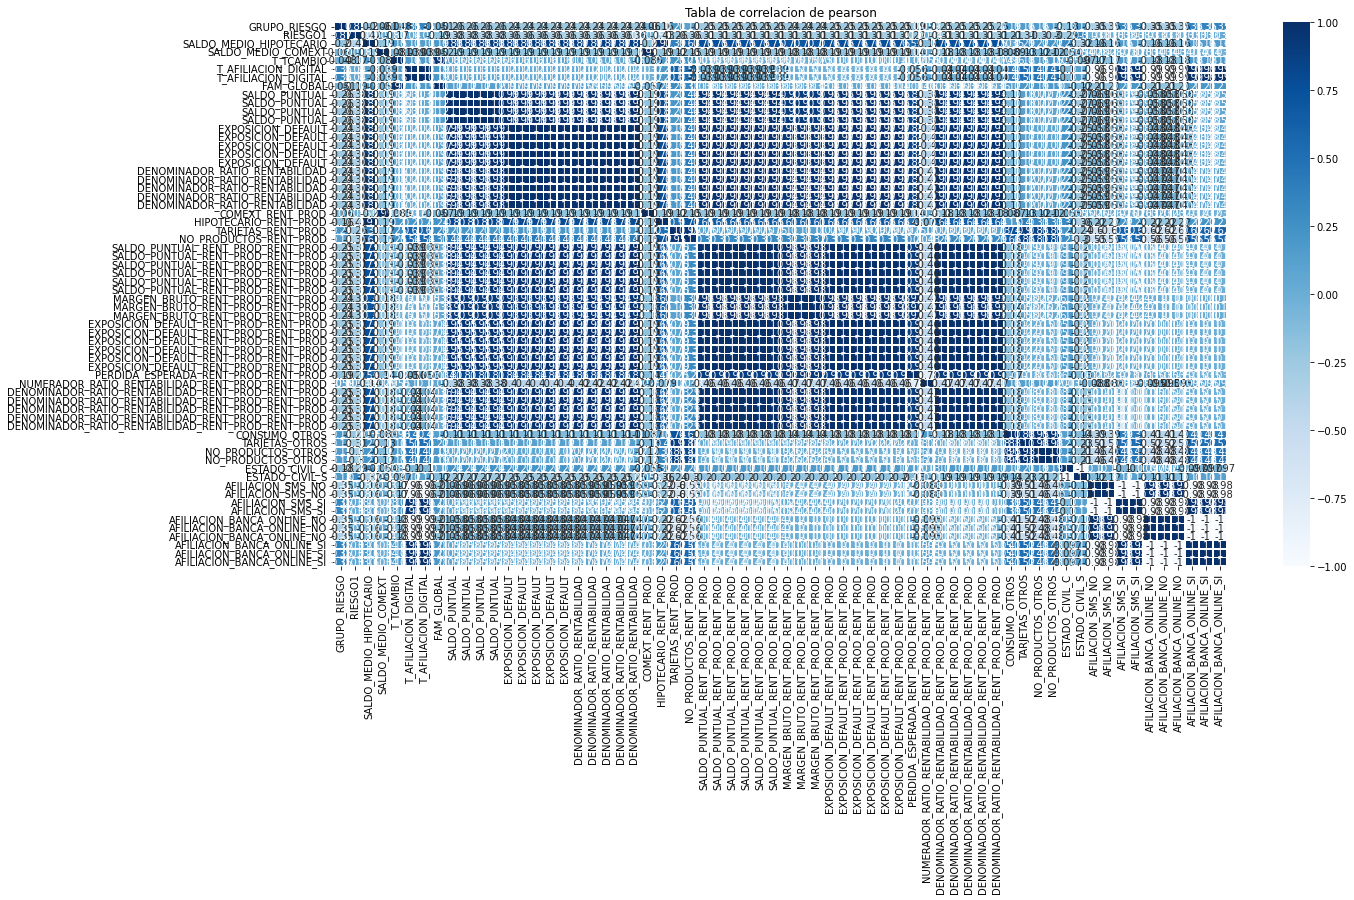

<Figure size 432x288 with 0 Axes>

In [61]:

corr = data1.corr("pearson")
plt.figure(figsize=(20, 10))
sns.heatmap(corr, xticklabels = corr.columns.values,yticklabels = corr.columns.values\
            ,annot = True,linewidths = .6, cmap="Blues")
plt.title("Tabla de correlacion de " + "pearson")
plt.show()
plt.clf()

In [62]:
# Creamos una matriz de Coorelación positiva
data2 = df.corr().abs()

# Creamos una mascara booleana
mask = np.triu(np.ones_like(data2, dtype=bool))
tri_df = data2.mask(mask)
tri_df

# Lista to drop

to_drop = [c for c in tri_df.columns if any (tri_df[c] > umbral_corr)]
to_drop

['GRUPO_RIESGO',
 'SALDO_MEDIO_HIPOTECARIO',
 'SALDO_MEDIO_COMEXT',
 'T_TCAMBIO',
 'T_AFILIACION_DIGITAL',
 'SALDO_PUNTUAL',
 'EXPOSICION_DEFAULT',
 'DENOMINADOR_RATIO_RENTABILIDAD',
 'TARJETAS_RENT_PROD',
 'SALDO_PUNTUAL_RENT_PROD_RENT_PROD',
 'MARGEN_BRUTO_RENT_PROD_RENT_PROD',
 'EXPOSICION_DEFAULT_RENT_PROD_RENT_PROD',
 'PERDIDA_ESPERADA_RENT_PROD_RENT_PROD',
 'CONSUMO_OTROS',
 'TARJETAS_OTROS',
 'GENERO_F',
 'ESTADO_CIVIL_C',
 'AFILIACION_SMS_NO',
 'AFILIACION_SMS_SI',
 'AFILIACION_BANCA_ONLINE_NO']

In [63]:
# Borrar var correlacionadas del DF
df = df.drop(to_drop, axis=1)
df

,CODIGO_CLIENTE,TIPO_DOCUMENTO,NUMERO_DOCUMENTO,EDAD,UBIGEO_DIRECCION,SEGMENTO_COMERCIAL,INGRESO_MENSUAL,PERIODO,RIESGO1,RIESGO2,SALDO_MEDIO_VISTA,SALDO_MEDIO_AHORRO,SALDO_MEDIO_CTS,SALDO_MEDIO_PLAZO,SALDO_MEDIO_FONDO_MUTUO,SALDO_MEDIO_AUTOS,SALDO_MEDIO_CONSUMO,SALDO_MEDIO_TARJETAS,SALDO_MEDIO_CARTERA,SALDO_MEDIO_LEASING,SALDO_MEDIO_PRESTAMOS_COMERCIALES,SALDO_MEDIO_TJ_EMPRESAS,T_NETCASH,T_SEGURO,T_WALLET,T_CARGO_RECURRENTE,SALDO_MEDIO_INVERSION_RENTABLE,SALDO_MEDIO_CARTERA_ATRASADA,VINCULACION_PN,VINCULACION_EMPRESA,FAM_GLOBAL,MARGEN_BRUTO,PERDIDA_ESPERADA,NUMERADOR_RATIO_RENTABILIDAD,ABONOS_TDC,CARGOS_TDC,AUTOS_RENT_PROD,CARTERA_RENT_PROD,COMEXT_RENT_PROD,CONSUMO_RENT_PROD,HIPOTECARIO_RENT_PROD,LEASING_RENT_PROD,PRESTAMOS_COMERCIALES_RENT_PROD,TJ_EMPRESAS_RENT_PROD,NO_PRODUCTOS_RENT_PROD,NUMERADOR_RATIO_RENTABILIDAD_RENT_PROD_RENT_PROD,DENOMINADOR_RATIO_RENTABILIDAD_RENT_PROD_RENT_PROD,AUTOS_OTROS,CARTERA_OTROS,COMEXT_OTROS,HIPOTECARIO_OTROS,LEASING_OTROS,PRESTAMOS_COMERCIALES_OTROS,TJ_EMPRESAS_OTROS,NO_PRODUCTOS_OTROS,SALDO_OTROS,ATT,ABANDONO,GENERO_M,ESTADO_CIVIL_D,ESTADO_CIVIL_O,ESTADO_CIVIL_S,ESTADO_CIVIL_V,AFILIACION_BANCA_ONLINE_SI
0,78061255,1,38149491,76,2501006,1,1038.63,202011,0,0,0.00,1.87,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0.08,0.00,0.05,0.00,0.00,0,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0,0,0,1,0,0
1,48102108,1,23914625,56,2501001,1,1038.63,202011,0,0,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,0,0,0,0,0.00,0.00,0.00,1,1,0,0,0,0
2,75218927,1,2180900,66,2501001,1,824.78,202011,0,0,0.00,12722.36,0.00,0.00,0.00,0.00,293.18,0.00,0.00,0.00,0.00,0.00,0,0,1,0,7139.34,0.00,1,0,0,1589.23,201.67,978.23,0.00,0.00,0,0,0,1,0,0,0,0,2,533.64,755.69,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0,0,0,1,0,1
3,32630609,1,51973609,61,1601004,1,2023.63,202011,0,0,0.00,135.78,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,4.77,0.00,3.36,0.00,0.00,0,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0,0,0,0,0,1
4,96551001,1,17727421,68,2501001,1,993.06,202011,0,0,5120.33,17400.33,0.00,11981.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,1,1,0,0.00,0.00,1,0,0,14503.66,329.06,9993.09,0.00,0.00,0,0,0,1,0,0,0,0,2,49.31,70.32,0,0,0,0,0,0,0,0,0.00,0.00,0.00,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600038,43822426,1,59600391,27,201006,3,3080.10,202106,0,0,0.00,795.58,0.00,0.00,0.00,0.00,293.18,0.00,0.00,0.00,0.00,0.00,0,0,1,0,7686.88,0.00,0,0,0,1751.55,93.52,964.56,0.00,0.00,0,0,0,1,0,0,0,0,2,891.42,936.46,0,0,0,0,0,0,0,0,0.00,0.00,0.00,1,0,0,1,0,1
600039,90789854,1,16629537,26,101039,3,2777.65,202106,2,0,0.00,632.60,1.54,0.00,0.00,0.00,0.00,752.99,0.00,0.00,0.00,0.00,0,0,0,0,752.99,0.00,0,0,0,-1346.50,13.44,-971.65,600.00,30.00,0,0,0,0,0,0,0,0,1,25.61,8.58,0,0,0,0,0,0,0,1,710.79,0.67,0.00,0,0,0,1,0,1
600040,4661360,1,98090485,27,101031,3,3381.42,202106,0,0,0.00,15926.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,1,0,0,17987.93,0.00,0,0,3,1417.86,2909.41,-1586.76,0.00,0.00,0,0,0,0,0,0,1,1,2,-2257.27,195.83,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0,0,0,1,0,1
600041,59762763,1,84540864,50,2001003,3,1124.50,202106,2,2,0.00,16.48,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0.00,0.00,0,0,0,0.20,0.00,-7.75,0.00,0.00,0,0,0,0,0,0,1,0,1,0.00,0.00,0,0,0,0,0,0,0,0,0.00,0.00,0.00,1,0,0,0,0,0


In [64]:
# # Calcular correlación de Variables
# # ----------------------------------------------- Correlación de Pearson -----------------------------------------------
# tabla_corr = data


# def correlacion(method = ["pearson","spearman","kendall"]):
  
#   numericas=['CODIGO_CLIENTE', 'TIPO_DOCUMENTO', 'NUMERO_DOCUMENTO', 'EDAD',
#       'UBIGEO_DIRECCION', 'SEGMENTO_COMERCIAL', 'INGRESO_MENSUAL',
#       'GRUPO_RIESGO', 'PERIODO', 'RIESGO1', 'RIESGO2', 'RIESGO3',
#       'SALDO_MEDIO_VISTA', 'SALDO_MEDIO_AHORRO', 'SALDO_MEDIO_CTS',
#       'SALDO_MEDIO_PLAZO', 'SALDO_MEDIO_FONDO_MUTUO', 'SALDO_MEDIO_AUTOS',
#       'SALDO_MEDIO_CONSUMO', 'SALDO_MEDIO_TARJETAS',
#       'SALDO_MEDIO_HIPOTECARIO', 'SALDO_MEDIO_CARTERA', 'SALDO_MEDIO_LEASING',
#       'SALDO_MEDIO_PRESTAMOS_COMERCIALES', 'SALDO_MEDIO_COMEXT',
#       'SALDO_MEDIO_TJ_EMPRESAS', 'FAM_COBRANZAS', 'FAM_COMEX',
#       'FAM_PAGOHABERES', 'FAM_PROVEEDORES', 'FAM_SUPPLY', 'FAM_VISANET',
#       'T_NETCASH', 'T_SEGURO', 'T_WALLET', 'T_TCAMBIO',
#       'T_AFILIACION_DIGITAL', 'T_CARGO_RECURRENTE',
#       'SALDO_MEDIO_INVERSION_RENTABLE', 'SALDO_MEDIO_CARTERA_ATRASADA',
#       'VINCULACION_PN', 'VINCULACION_EMPRESA', 'SALDO_PUNTUAL',
#       'MARGEN_FINANCIERO', 'COMISIONES', 'MARGEN_BRUTO', 'EXPOSICION_DEFAULT',
#       'PERDIDA_ESPERADA', 'NUMERADOR_RATIO_RENTABILIDAD',
#       'DENOMINADOR_RATIO_RENTABILIDAD']

#   print('-------------------------------------------- VARIABLES NUMERICAS-------------------------------------------------------')

#   var_num = numericas
#   cont = 1
  
  
  
#   for var in var_num:
#       tabla_corr[var]=tabla_corr[var].astype(float)

#   corr = tabla_corr.corr(method)
#   plt.figure(figsize=(20, 10))
#   sns.heatmap(corr, xticklabels = corr.columns.values,yticklabels = corr.columns.values\
#               ,annot = True,linewidths = .6, cmap="Blues")
#   plt.title("Tabla de correlacion de " + method)
#   plt.show()
#   plt.clf()


In [65]:
df.columns

Index(['CODIGO_CLIENTE', 'TIPO_DOCUMENTO', 'NUMERO_DOCUMENTO', 'EDAD',
       'UBIGEO_DIRECCION', 'SEGMENTO_COMERCIAL', 'INGRESO_MENSUAL', 'PERIODO',
       'RIESGO1', 'RIESGO2', 'SALDO_MEDIO_VISTA', 'SALDO_MEDIO_AHORRO',
       'SALDO_MEDIO_CTS', 'SALDO_MEDIO_PLAZO', 'SALDO_MEDIO_FONDO_MUTUO',
       'SALDO_MEDIO_AUTOS', 'SALDO_MEDIO_CONSUMO', 'SALDO_MEDIO_TARJETAS',
       'SALDO_MEDIO_CARTERA', 'SALDO_MEDIO_LEASING',
       'SALDO_MEDIO_PRESTAMOS_COMERCIALES', 'SALDO_MEDIO_TJ_EMPRESAS',
       'T_NETCASH', 'T_SEGURO', 'T_WALLET', 'T_CARGO_RECURRENTE',
       'SALDO_MEDIO_INVERSION_RENTABLE', 'SALDO_MEDIO_CARTERA_ATRASADA',
       'VINCULACION_PN', 'VINCULACION_EMPRESA', 'FAM_GLOBAL', 'MARGEN_BRUTO',
       'PERDIDA_ESPERADA', 'NUMERADOR_RATIO_RENTABILIDAD', 'ABONOS_TDC',
       'CARGOS_TDC', 'AUTOS_RENT_PROD', 'CARTERA_RENT_PROD',
       'COMEXT_RENT_PROD', 'CONSUMO_RENT_PROD', 'HIPOTECARIO_RENT_PROD',
       'LEASING_RENT_PROD', 'PRESTAMOS_COMERCIALES_RENT_PROD',
       'TJ_EMPRESA

## EDA

In [ ]:
# #INTERACTIVA
# #Crreación función con un for que recorra todas las variables numerocas del df y nos muestre su histograma, percentiles y datos relevantes

# @interact
# def stats_vars(bins = [10,20,30,40,50,60,70,80,90,100],
#                facecolor = ['grey','lightblue','orange','green','red']
#               ):
    
#      # Lista de variables numericas
#     numericas=['CODIGO_CLIENTE', 'TIPO_DOCUMENTO', 'NUMERO_DOCUMENTO', 'EDAD',
#        'UBIGEO_DIRECCION', 'SEGMENTO_COMERCIAL', 'INGRESO_MENSUAL',
#        'GRUPO_RIESGO', 'PERIODO', 'RIESGO1', 'RIESGO2', 'RIESGO3',
#        'SALDO_MEDIO_VISTA', 'SALDO_MEDIO_AHORRO', 'SALDO_MEDIO_CTS',
#        'SALDO_MEDIO_PLAZO', 'SALDO_MEDIO_FONDO_MUTUO', 'SALDO_MEDIO_AUTOS',
#        'SALDO_MEDIO_CONSUMO', 'SALDO_MEDIO_TARJETAS',
#        'SALDO_MEDIO_HIPOTECARIO', 'SALDO_MEDIO_CARTERA', 'SALDO_MEDIO_LEASING',
#        'SALDO_MEDIO_PRESTAMOS_COMERCIALES', 'SALDO_MEDIO_COMEXT',
#        'SALDO_MEDIO_TJ_EMPRESAS', 'FAM_COBRANZAS', 'FAM_COMEX',
#        'FAM_PAGOHABERES', 'FAM_PROVEEDORES', 'FAM_SUPPLY', 'FAM_VISANET',
#        'T_NETCASH', 'T_SEGURO', 'T_WALLET', 'T_TCAMBIO',
#        'T_AFILIACION_DIGITAL', 'T_CARGO_RECURRENTE',
#        'SALDO_MEDIO_INVERSION_RENTABLE', 'SALDO_MEDIO_CARTERA_ATRASADA',
#        'VINCULACION_PN', 'VINCULACION_EMPRESA', 'SALDO_PUNTUAL',
#        'MARGEN_FINANCIERO', 'COMISIONES', 'MARGEN_BRUTO', 'EXPOSICION_DEFAULT',
#        'PERDIDA_ESPERADA', 'NUMERADOR_RATIO_RENTABILIDAD',
#        'DENOMINADOR_RATIO_RENTABILIDAD', 'RATIO_RENTABILIDAD']

#     print('-------------------------------------------- VARIABLES NUMERICAS-------------------------------------------------------')

#     var_num = df.columns
#     cont = 1
    
#     for c in var_num:
#         print('\n///////////////////////////////////////',cont,")",c,'////////////////////////////////////////////////////////////')
#         df[c] = df[c].astype(float)
#             #N° de vacíos
#         print('N° nulos:', df.loc[df[c].isna()==True].shape[0])
#         # contar el número de categorías únicas
#         num_cat = len(df[c].unique())
#         cont += 1
#         print('N° de valores distintos:', num_cat)

#         # Mostrar dataframe con los valores
#         g_aux = 100*df[c].value_counts(normalize=True).to_frame().head(10)
#         g_aux.rename(columns={c : 'Porcentaje'}, inplace=True)
#         g_aux.reset_index(inplace=True)
#         g_aux.rename(columns={'index' : c}, inplace=True)
#         display(g_aux)

#         df[c].plot(kind='hist', bins= bins, figsize=(12,6), facecolor= facecolor,edgecolor='black')
#         #plt.figure(figsize=(30, 10))
#         #plt.hist(df[c], bins=20)
#         display(df[c].describe())
#         deciles = np.arange(1, 10) * 10
#         deciles_dist = [np.percentile(df[c], dec) for dec in deciles]
#         print('percentiles ' + str(deciles_dist))
#         plt.show()

## Normalización

In [66]:
df.shape

(600043, 64)

In [67]:
df.shape[1]

64

In [68]:
# Definir variables de entrada
X = df.iloc[:,0:df.shape[1]].values 
X

array([[7.8061255e+07, 1.0000000e+00, 3.8149491e+07, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [4.8102108e+07, 1.0000000e+00, 2.3914625e+07, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [7.5218927e+07, 1.0000000e+00, 2.1809000e+06, ..., 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       ...,
       [4.6613600e+06, 1.0000000e+00, 9.8090485e+07, ..., 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00],
       [5.9762763e+07, 1.0000000e+00, 8.4540864e+07, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [7.4714852e+07, 1.0000000e+00, 8.2682342e+07, ..., 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00]])

In [69]:

# Aplicar Normalización: Standard Scaler

# Creamos el Objeto de Escalamiento
std_scaler = StandardScaler()

# aplicamos fit y transform a la data 
X_std = std_scaler.fit_transform(X)

X_std

array([[ 0.97275386, -0.00447202, -0.41538053, ...,  0.63601841,
        -0.1036998 , -1.31558257],
       [-0.06736667, -0.00447202, -0.90637332, ..., -1.57228153,
        -0.1036998 , -1.31558257],
       [ 0.87407403, -0.00447202, -1.65601875, ...,  0.63601841,
        -0.1036998 ,  0.76011953],
       ...,
       [-1.57554091, -0.00447202,  1.6521202 , ...,  0.63601841,
        -0.1036998 ,  0.76011953],
       [ 0.33746751, -0.00447202,  1.18476307, ..., -1.57228153,
        -0.1036998 , -1.31558257],
       [ 0.85657357, -0.00447202,  1.12065843, ...,  0.63601841,
        -0.1036998 ,  0.76011953]])

## Método del Codo

In [70]:
X = X_std

In [71]:
max_k = 10    ## maximo número de clusters que vamos a crear


K = range(1,max_k+1)
ssw = []

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)

    centers = pd.DataFrame(kmeanModel.cluster_centers_)
    labels = kmeanModel.labels_
    
    ssw_k = sum(np.min(cdist(X, kmeanModel.cluster_centers_, "euclidean"), axis = 1))
    ssw.append(ssw_k)
    print(k)
    print(ssw_k)
    print(ssw)
    



1
3487373.52396217
[3487373.52396217]
2
3282590.1666842327
[3487373.52396217, 3282590.1666842327]
3
3257598.4186466564
[3487373.52396217, 3282590.1666842327, 3257598.4186466564]
4
3204948.943314501
[3487373.52396217, 3282590.1666842327, 3257598.4186466564, 3204948.943314501]


KeyboardInterrupt: ignored

In [ ]:
#Representación del codo
plt.plot(K, ssw, "bx-")
plt.xlabel("k")
plt.ylabel("SSw(k)")
plt.title("La técnica del codo para encontrar el k óptimo")
plt.show()

## Clusters

In [ ]:
# alfa = data.corr().melt()
# alfa = alfa[(abs(alfa.value) > 0.7) & (abs(alfa.value) < 1) ]
# cols = data.columns
# variables_corr = [i for i in cols if i not in alfa.variable]
# data1 = data[variables_corr]
# data1 = data1.corr()
# data1

In [72]:
kmeanModel = KMeans(n_clusters=6).fit(X)

centers = pd.DataFrame(kmeanModel.cluster_centers_)
labels = kmeanModel.labels_
df["labels"] = labels


In [73]:
beta = df.groupby(["labels"]).mean()
beta = beta[["EDAD", "SALDO_MEDIO_VISTA", "SALDO_MEDIO_AUTOS", "SALDO_MEDIO_TARJETAS", "HIPOTECARIO_RENT_PROD", 
             "AUTOS_RENT_PROD", "CARTERA_RENT_PROD", "COMEXT_RENT_PROD", "CONSUMO_RENT_PROD", "LEASING_RENT_PROD",
             "NO_PRODUCTOS_RENT_PROD", "FAM_GLOBAL","NUMERADOR_RATIO_RENTABILIDAD_RENT_PROD_RENT_PROD", "DENOMINADOR_RATIO_RENTABILIDAD_RENT_PROD_RENT_PROD",
             "ABANDONO","ATT","VINCULACION_PN"]]
beta

,EDAD,SALDO_MEDIO_VISTA,SALDO_MEDIO_AUTOS,SALDO_MEDIO_TARJETAS,HIPOTECARIO_RENT_PROD,AUTOS_RENT_PROD,CARTERA_RENT_PROD,COMEXT_RENT_PROD,CONSUMO_RENT_PROD,LEASING_RENT_PROD,NO_PRODUCTOS_RENT_PROD,FAM_GLOBAL,NUMERADOR_RATIO_RENTABILIDAD_RENT_PROD_RENT_PROD,DENOMINADOR_RATIO_RENTABILIDAD_RENT_PROD_RENT_PROD,ABANDONO,ATT,VINCULACION_PN
labels,,,,,,,,,,,,,,,,,
0,42.84,15.52,27.46,466.06,0.03,0.01,0.00,0.00,0.68,0.00,1.36,0.03,26.65,1400.59,0.01,0.09,0.34
1,48.01,341.20,521.37,226.77,0.08,0.05,0.00,0.01,0.17,0.04,1.84,0.22,-12541.28,48408.13,0.01,0.11,0.06
2,37.88,2.66,4.56,15.80,0.00,0.00,0.00,0.00,0.03,0.00,0.10,0.00,-4.21,11.19,0.00,0.01,0.03
3,61.13,12.64,2.57,31.14,0.01,0.00,0.00,0.00,0.03,0.00,0.15,0.00,3.51,36.61,0.00,0.01,0.03
4,44.05,333.48,277.24,1298.49,0.18,0.05,0.00,0.00,0.41,0.00,1.64,0.05,1886.20,7111.25,0.00,0.05,0.62
5,47.75,1151.98,2105.17,866.25,0.64,0.20,0.00,0.00,0.53,0.00,2.26,0.29,5279.93,27908.87,0.01,0.06,0.85


**Grupo 0: Jovenes**
*Alta Transaccionalidad y Costosos al Banco*

* Tienen auto
* Pocos Productos
* Saldo medio en tajetas
* Son rentables
* Abandono maximo de un mes
* Transaccionalidad alta
* No son deudores
* Poco vinciulados

**Grupo 1: Estrella**
*Muy vinculados y con alta transaccionalodad*
 
* Alto Saldo Medio
* Tienen Auto
* Tienen más productos hipotecarios
* Rentabilidad alta para el banco
* Alta inversion de parte del banco
* Uso constante de servicos del banco
* Altamente Vinculados

**Grupo 2: Totaleros**
*No usan tanto sus productos y no les gusta deber*

* Poco Saldo Medio a la Vista
* Tienen Auto
* No les gusta deber
* Rentabilidad media
* Tienen pocos productos con el banco
* Desatencion Alta

**Grupo 3: Potenciales**
*Muchos productos y poca liquidez*

* Saldo Medio a la Vista Comun 
* Tienen auto
* Usan de tarjetas
* Mayor numero de productos
* Tardan en pagar
* Rentabilidad media
* Desatención alta

**Grupo 4: De Oportunidad**
*Usan sus tarjetas en promociones y deudores*

* Poco saldo medio
* Tienen Auto
* Deben tarjetas
* No tardan en pagar
* Tienen mal ratio de rentabilidad
* Periodos de maximo un mes de inactividad
* Alta vinculación

**Grupo 5: Desatendido**
*Clientes con mayor edad y con poca atención al banco*

* Son los de mayor de edad
* Tienen pocos productos
* Pobre vinculacion
* Pobre ratio de rentabilidad
* No dejan dinero en su cuenta 


In [ ]:
# Guardado 
beta.to_csv(HT_PATH + "/bbva_fisicas_mean.csv")
df.to_csv(HT_PATH + "/bbva_fisicas_cl.csv")

In [ ]:
# Pickle
pkl_filename = HT_PATH + "/fisicas_pickle.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(kmeanModel, file)

In [ ]:

# def grafica(tresD = [True, False],
#            opacidad = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
#             tamaño = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200],
#             marca = ["o",".",",","v","^","<",">","1","2","3","4","8","s","p","*","H","h","+","X","x","D","d","|","_"],
#             colores = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'],
#             a = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360],
#             b = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360]
#            ):
  
#   plt.figure(figsize = (16, 9))
  
#   if tresD == True:

#     color_list = data["target"]
#     color_mapping = {'ALTO': 2, 'MEDIO': 1, 'BAJO':0}  
#     color_indicator = [color_mapping[color] if color in color_mapping else 'na' for color in color_list]
#     ax = plt.axes(projection ="3d")     
#     ax.scatter3D(x, y, z, c = color_indicator, s = tamaño, marker = marca, alpha = opacidad, cmap = colores)
#     ax.view_init(a, b)
#     ax.set_zlabel('Z')
      
#   else:
#     # color_list = data["target"]
#     # color_mapping = {'ALTO': 2, 'MEDIO': 1, 'BAJO':0}  
#     #color_indicator = [color_mapping[color] if color in color_mapping else 'na' for color in color_list]
#     colors = np.array(["black", "green"]
#     plt.scatter(data["principal component 1"], data["principal component 2"], c = colors[data["target"].values], 
#                 s = tamaño, marker = marca, alpha = opacidad,cmap = colores)
  
#   plt.legend(['componente 1', 'componente 2'])
#   plt.xlabel('X')
#   plt.ylabel('Y')
#   plt.title('Nube de Puntos: Modelo Clusterización')
#   #plt.colorbar()
#   plt.show()
    
